In [1]:
import sys,os 
os.chdir('.\..\..')

In [128]:
import deep_nn.deep_nn_model as nn
import deep_nn.deep_nn_utils as nn_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

In [59]:
train = pd.read_csv("./data_analysis/projekt1/regression/data.activation.train.1000.csv")
test = pd.read_csv("./data_analysis/projekt1/regression/data.activation.test.1000.csv")


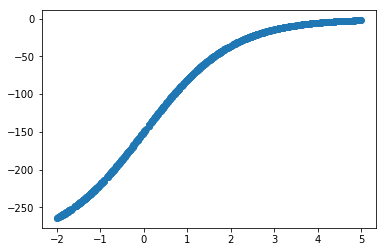

In [60]:
plt.scatter(train.x, train.y)

In [144]:
def grid_search(params, tasktype, train, test):
    if tasktype == "regression":
        loss = "MSE"
        lastactivation = "linear"
        X = train.x.values.reshape(-1, 1)
        Y = train.y.values.reshape(-1, 1)
        Xtest = test.x.values.reshape(-1, 1)
        Ytest = test.y.values.reshape(-1, 1)
    if tasktype == "classification":
        loss = "binary_crossentropy"
        lastactivation = "sigmoid"
        X = train[['x', 'y']].values.T
        Y = train.cls.values.reshape(-1, 1)
        Xtest = test[['x', 'y']].values.T
        Ytest = test.cls.values.reshape(-1, 1)
    if tasktype == "multi":
        loss = "categorical_crossentropy"
        lastactivation = "sigmoid"
        X = train.x.values.reshape(-1, 1)
        Y = train.y.values.reshape(-1, 1)
        Xtest = test.x.values.reshape(-1, 1)
        Ytest = test.y.values.reshape(-1, 1)
    X_scaler = StandardScaler()
    X_scaled = X_scaler.fit_transform(X).reshape(-1, 1)
    Xtest_scaled = X_scaler.transform(Xtest).reshape(-1, 1)
    for tab in params:
        layersizes = tab[0]
        bias = tab[1]
        activation =  tab[2]
        batch = tab[3]
        learning_rate = tab[4]
        momentum = tab[5]
        epochs = tab[6]
        verbose = tab[7]
        nn_builder = nn.SequentialBuilder()
        for layersize in layersizes[:-1]:
            nn_builder.add_dense(layersize, activation)
        nn_builder.add_dense(1, lastactivation)
        model = nn_builder.compile(loss, disable_bias = bias)
        #for i in range(0,5):
        parameters, costs = model.fit(X_scaled.T, Y.T, 
                                      num_epochs=epochs, 
                                      learning_rate = learning_rate, 
                                      momentum = momentum, 
                                      mini_batch_size = batch,
                                     verbose = verbose)
        if tasktype == "regression":
            Ypred  = model.predict(Xtest_scaled.T)
            mse= nn_utils.quadratic_cost(Ypred.T, Ytest, len(Ytest))
            print ('Params: ',layersizes, bias,activation,batch,learning_rate,momentum,epochs,', Result: ',mse)

        if tasktype == "classification":
            Ypred  = model.predict_classes(Xtest_scaled.T)
            return Ypred
            acc= accuracy_score(Ypred.T, Ytest)
            print ('Params: ',layersizes, bias,activation,batch,learning_rate,momentum,epochs,', Accuracy: ',acc)


    return Ypred

In [5]:
layersizes = [[2,2,1],[2,5,5,1], [2,10,6,4,1]] 
activations = ['sigmoid','relu', 'linear','tanh','softmax']
losses =['MSE','binary_crossentropy','categorical_crossentropy']
disable_bias = [False,True]
learning_rate = [0.01,0.05,0.1,0.2,0.5]
momentum = [0.5,0.8,0.9,0.95,0.99]
num_epochs = [1000,2000,3000]
min_batch_size = [1,32,64,256,1024]

std_batch_size = 64
std_layer_size = [2,5,5,1]
std_learning_rate = 0.1
std_momentum = 0.9
std_epochs = 5000


In [87]:
layersizes = [[2,2,1],[2,5,5,1], [2,10,6,4,1]] 
activations = ['sigmoid','relu', 'linear','tanh','softmax']
losses =['MSE','binary_crossentropy','categorical_crossentropy']
disable_bias = [False,True]
learning_rate = [0.01,0.05,0.1,0.2,0.5]
momentum = [0.5,0.8,0.9,0.95,0.99]
num_epochs = [1000,2000,3000]
min_batch_size = [1,32,64,256,1024]

std_batch_size = 64
std_layer_size = [2,5,5,1]
std_learning_rate = 0.001
std_momentum = 0.9
std_epochs = 5000

disable_bias = [False,True]
activations = ['tanh','sigmoid']

X = train.x.values.reshape(-1, 1)
Y = train.y.values.reshape(-1, 1)
Xtest = test.x.values.reshape(-1, 1)
Ytest = test.y.values.reshape(-1, 1)
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X).reshape(-1, 1)
Xtest_scaled = X_scaler.transform(Xtest).reshape(-1, 1)
for tab in itertools.product(disable_bias,activations):
    bias = tab[0]
    activation =  tab[1]
    nn_builder = nn.SequentialBuilder()
    nn_builder.add_dense(1, activation)
    nn_builder.add_dense(5, activation)
    nn_builder.add_dense(5, activation)
    nn_builder.add_dense(1, 'linear')
    model = nn_builder.compile('MSE', disable_bias = bias)
    mse = []
    #for i in range(0,5):
    parameters, costs = model.fit(X_scaled.T, Y.T, 
                                  num_epochs=std_epochs, 
                                  learning_rate = std_learning_rate, 
                                  momentum = std_momentum, 
                                  mini_batch_size = std_batch_size,
                                 verbose = False)
    Ypred  = model.predict(Xtest_scaled.T)
    mse.append( nn_utils.quadratic_cost(Ypred.T, Ytest, len(Ytest)))
    print (bias,activation,mse)

False tanh [150.856841720091]
False sigmoid [145.4115263221018]
True tanh [15048.194934612538]
True sigmoid [44.265080652958545]


In [99]:
[2,5,5,1][:-1]

[2, 5, 5]

In [174]:
layersizes = [[2,2,1],[2,5,5,1], [2,10,6,4,1]] 
activations = ['sigmoid','relu', 'linear','tanh','softmax']
losses =['MSE','binary_crossentropy','categorical_crossentropy']
disable_bias = [False,True]
learning_rate = [0.01,0.05,0.1,0.2,0.5]
momentum = [0.5,0.8,0.9,0.95,0.99]
num_epochs = [1000,2000,3000]
min_batch_size = [1,32,64,256,1024]

std_batch_size = [64]
std_layer_size = [[1,5,5,1]]
std_learning_rate = [0.0001,0.0005,0.001,0.005,0.01]
std_momentum = [0.5,0.75,0.9,0.99]
std_epochs =[2500]

disable_bias = [False]
activations = ['tanh']

grid_search(itertools.product(std_layer_size,disable_bias,activations,std_batch_size,std_learning_rate,std_momentum,std_epochs,verbose), "regression", train,test)

Params:  [1, 5, 5, 1] False tanh 64 0.0001 0.5 2500 , Result:  0.3103124074085438
Params:  [1, 5, 5, 1] False tanh 64 0.0001 0.75 2500 , Result:  0.31031307564236105
Params:  [1, 5, 5, 1] False tanh 64 0.0001 0.9 2500 , Result:  0.3103136785519146
Params:  [1, 5, 5, 1] False tanh 64 0.0001 0.99 2500 , Result:  0.3103240405051684
Params:  [1, 5, 5, 1] False tanh 64 0.0005 0.5 2500 , Result:  0.3171793963330775
Params:  [1, 5, 5, 1] False tanh 64 0.0005 0.75 2500 , Result:  0.31719216128066635
Params:  [1, 5, 5, 1] False tanh 64 0.0005 0.9 2500 , Result:  0.3172158237667803
Params:  [1, 5, 5, 1] False tanh 64 0.0005 0.99 2500 , Result:  0.3174580076051275
Params:  [1, 5, 5, 1] False tanh 64 0.001 0.5 2500 , Result:  0.31751091106549406
Params:  [1, 5, 5, 1] False tanh 64 0.001 0.75 2500 , Result:  0.3175287560500047
Params:  [1, 5, 5, 1] False tanh 64 0.001 0.9 2500 , Result:  0.3175530766234806
Params:  [1, 5, 5, 1] False tanh 64 0.001 0.99 2500 , Result:  0.3177238261951522
Params:  [1

array([[-0.04384103,  0.09047815,  0.18262421, -0.01767383,  0.00222425,
         0.00746247,  0.00750924,  0.07902762,  0.20173989, -0.00969843,
         0.03250084,  0.16538711, -0.03424775,  0.00748059,  0.09872514,
         0.09104745,  0.1323808 ,  0.01801486,  0.07868802,  0.16986038,
         0.02274473,  0.16980586, -0.04310365,  0.11773908,  0.07798486,
         0.00873433,  0.1533073 ,  0.00370851,  0.10471399, -0.08564011,
         0.16771561, -0.01149654,  0.18003811, -0.02998591,  0.16235817,
         0.12403397,  0.0922807 ,  0.00120626,  0.1391398 , -0.00128017,
         0.03969813, -0.01884778,  0.00210226,  0.09036757,  0.09025002,
         0.07731288, -0.0208441 , -0.02747137, -0.02267656, -0.02934195,
        -0.08280885, -0.01915575, -0.05317965, -0.06787753, -0.04710069,
        -0.04851277, -0.03874351, -0.0521554 , -0.06995795, -0.06428697,
        -0.08949585, -0.08480547,  0.15444752, -0.01376989, -0.01644067,
        -0.01179558,  0.01488319,  0.02738525, -0.0

In [176]:
reg_filenames = [['data.activation.train.100','data.activation.test.100'],
                 ['data.activation.train.500','data.activation.test.500'],
                 ['data.activation.train.1000','data.activation.test.1000'],
                 ['data.cube.train.100','data.cube.test.100'],
                 ['data.cube.train.500','data.cube.test.500'],
                 ['data.cube.train.1000','data.cube.test.1000']]

for names in reg_filenames:
    print("Trainset: " + names[0])
    train = pd.read_csv("./data_analysis/projekt1/regression/" + names [0] + ".csv")
    test = pd.read_csv("./data_analysis/projekt1/regression/" + names [1] + ".csv")

    std_batch_size = [64]
    std_layer_size = [[1,5,5,1]]
    std_learning_rate = [0.001]
    std_momentum = [0.9]
    std_epochs =[ 5000]

    disable_bias = [False,True]
    activations = ['tanh']
    verbose = [False]
    grid_search(itertools.product(std_layer_size,disable_bias,activations,std_batch_size,std_learning_rate,std_momentum,std_epochs,verbose), "regression", train,test)

Trainset: data.activation.train.100
Params:  [1, 5, 5, 1] False tanh 64 0.001 0.9 5000 , Result:  276.6152732940198
Params:  [1, 5, 5, 1] True tanh 64 0.001 0.9 5000 , Result:  13758.664238599318
Trainset: data.activation.train.500


KeyboardInterrupt: 

In [175]:
    train = pd.read_csv("./data_analysis/projekt1/regression/data.cube.train.100.csv")
    test = pd.read_csv("./data_analysis/projekt1/regression/data.cube.test.100.csv")

    std_batch_size = [64]
    std_layer_size = [[1,5,5,1]]
    std_learning_rate = [0.001]
    std_momentum = [0.9]
    std_epochs =[ 5000]

    disable_bias = [False]
    activations = ['tanh']
    verbose = [False]
    Ypred = grid_search(itertools.product(std_layer_size,disable_bias,activations,std_batch_size,std_learning_rate,std_momentum,std_epochs,verbose), "regression",train,test)

Params:  [1, 5, 5, 1] False tanh 64 0.001 0.9 5000 , Result:  83523.51469645835


In [127]:
reg_filenames = [['data.activation.train.100','data.activation.test.100'],
                 ['data.activation.train.500','data.activation.test.500'],
                 ['data.cube.train.100','data.cube.test.100'],
                ['data.cube.train.500','data.cube.test.500'],]

for names in reg_filenames:
    print("Trainset: " + names[0])
    train = pd.read_csv("./data_analysis/projekt1/regression/" + names [0] + ".csv")
    test = pd.read_csv("./data_analysis/projekt1/regression/" + names [1] + ".csv")

    std_batch_size = [64]
    std_layer_size = [[1,5,5,1]]
    std_learning_rate = [0.0001,0.001,0.01,0.1]
    std_momentum = [0.5,0.75,0.9,0.99]
    std_epochs =[2500]

    disable_bias = [False]
    activations = ['tanh']
    verbose = [False]
    grid_search(itertools.product(std_layer_size,disable_bias,activations,std_batch_size,std_learning_rate,std_momentum,std_epochs,verbose), "regression", train,test)

Trainset: data.activation.train.100
Params:  [1, 5, 5, 1] False tanh 64 0.0001 0.5 2500 , Result:  7316.5425219872795
Params:  [1, 5, 5, 1] False tanh 64 0.0001 0.75 2500 , Result:  7319.649280974124
Params:  [1, 5, 5, 1] False tanh 64 0.0001 0.9 2500 , Result:  7328.119449074947
Params:  [1, 5, 5, 1] False tanh 64 0.0001 0.99 2500 , Result:  7392.024531757987
Params:  [1, 5, 5, 1] False tanh 64 0.001 0.5 2500 , Result:  447.53523029284753
Params:  [1, 5, 5, 1] False tanh 64 0.001 0.75 2500 , Result:  446.64248965371763
Params:  [1, 5, 5, 1] False tanh 64 0.001 0.9 2500 , Result:  445.1091993433822
Params:  [1, 5, 5, 1] False tanh 64 0.001 0.99 2500 , Result:  417.18277029270917
Params:  [1, 5, 5, 1] False tanh 64 0.01 0.5 2500 , Result:  1023.5991817369627
Params:  [1, 5, 5, 1] False tanh 64 0.01 0.75 2500 , Result:  639.444097421049
Params:  [1, 5, 5, 1] False tanh 64 0.01 0.9 2500 , Result:  170.36995891700718
Params:  [1, 5, 5, 1] False tanh 64 0.01 0.99 2500 , Result:  21.37796719

In [219]:
def grid_search(params, tasktype, train, test):
    if tasktype == "regression":
        loss = "MSE"
        lastactivation = "linear"
        X = train.x.values.reshape(-1, 1)
        Y = train.y.values.reshape(-1, 1)
        Xtest = test.x.values.reshape(-1, 1)
        Ytest = test.y.values.reshape(-1, 1)
        X_scaler = StandardScaler()
        X_scaled = X_scaler.fit_transform(X).reshape(-1, 1)
        Xtest_scaled = X_scaler.transform(Xtest).reshape(-1, 1)
    if tasktype == "classification":
        loss = "binary_crossentropy"
        lastactivation = "sigmoid"
        X = train[['x', 'y']].values.T
        Y = train.cls.values.reshape(1,- 1) == 1
        Xtest = test[['x', 'y']].values.T
        Ytest = test.cls.values.reshape(1, -1) == 1
        X_scaler = StandardScaler()
        X_scaled = X_scaler.fit_transform(X)
        Xtest_scaled = X_scaler.transform(Xtest)
    if tasktype == "multi":
        loss = "categorical_crossentropy"
        lastactivation = "sigmoid"
        X = train.x.values.reshape(-1, 1)
        Y = train.y.values.reshape(-1, 1)
        Xtest = test.x.values.reshape(-1, 1)
        Ytest = test.y.values.reshape(-1, 1)

    for tab in params:
        layersizes = tab[0]
        bias = tab[1]
        activation =  tab[2]
        batch = tab[3]
        learning_rate = tab[4]
        momentum = tab[5]
        epochs = tab[6]
        verbose = tab[7]
        nn_builder = nn.SequentialBuilder()
        for layersize in layersizes[:-1]:
            nn_builder.add_dense(layersize, activation)
        nn_builder.add_dense(1, lastactivation)
        model = nn_builder.compile(loss, disable_bias = bias)
        #for i in range(0,5):
        #print(Y)
        
        
        if tasktype == "regression":
            parameters, costs = model.fit(X_scaled, Y, 
                                      num_epochs=epochs, 
                                      learning_rate = learning_rate, 
                                      momentum = momentum, 
                                      mini_batch_size = batch,
                                      verbose = verbose)
            Ypred  = model.predict(Xtest_scaled.T)
            mse= nn_utils.quadratic_cost(Ypred.T, Ytest, len(Ytest))
            print ('Params: ',layersizes, bias,activation,batch,learning_rate,momentum,epochs,', Result: ',mse)

        if tasktype == "classification":
            parameters, costs = model.fit(X_scaled, (Y == 1), 
                                      num_epochs=epochs, 
                                      learning_rate = learning_rate, 
                                      momentum = momentum, 
                                      mini_batch_size = batch,
                                      verbose = verbose)
            Ypred  = model.predict_classes(Xtest_scaled)
            acc= accuracy_score(Ypred.T, Ytest.T)
            #print(Ypred)
            print ('Params: ',layersizes, bias,activation,batch,learning_rate,momentum,epochs,', Accuracy: ',acc)


    return Ypred

In [222]:
reg_filenames = [['data.simple.train.100','data.simple.test.100'],
                 ['data.simple.train.500','data.simple.test.500']]
reg_filenames = [['data.simple.train.1000','data.simple.test.1000']]

for names in reg_filenames:
    print("Trainset: " + names[0])
    train = pd.read_csv("./data_analysis/projekt1/classification/" + names [0] + ".csv")
    test = pd.read_csv("./data_analysis/projekt1/classification/" + names [1] + ".csv")
    
    std_batch_size = [64]
    std_layer_size = [[2,3,1],[2,2,2,1],[2,3,3,1],[2,4,4,1],[2,5,5,1],[2,10,6,4,1] ]
    std_learning_rate = [0.01]
    std_momentum = [0.9]
    std_epochs =[2500]

    disable_bias = [False]
    activations = ['tanh']
    verbose = [False]
    grid_search(itertools.product(std_layer_size,disable_bias,activations,std_batch_size,std_learning_rate,std_momentum,std_epochs,verbose), "classification", train,test)

Trainset: data.simple.train.1000
Params:  [2, 3, 1] False tanh 64 0.01 0.9 2500 , Accuracy:  0.748
Params:  [2, 2, 2, 1] False tanh 64 0.01 0.9 2500 , Accuracy:  0.36
Params:  [2, 3, 3, 1] False tanh 64 0.01 0.9 2500 , Accuracy:  0.643
Params:  [2, 4, 4, 1] False tanh 64 0.01 0.9 2500 , Accuracy:  0.549
Params:  [2, 5, 5, 1] False tanh 64 0.01 0.9 2500 , Accuracy:  0.75
Params:  [2, 10, 6, 4, 1] False tanh 64 0.01 0.9 2500 , Accuracy:  0.312


In [223]:
reg_filenames = [['data.simple.train.100','data.simple.test.100'],
                 ['data.simple.train.500','data.simple.test.500'],
                ['data.simple.train.1000','data.simple.test.1000']]

for names in reg_filenames:
    print("Trainset: " + names[0])
    train = pd.read_csv("./data_analysis/projekt1/classification/" + names [0] + ".csv")
    test = pd.read_csv("./data_analysis/projekt1/classification/" + names [1] + ".csv")
    
    std_batch_size = [64]
    std_layer_size = [[2,5,5,1] ]
    std_learning_rate = [0.01]
    std_momentum = [0.9]
    std_epochs =[2500]

    disable_bias = [False]
    activations = ['tanh','sigmoid','relu','linear']
    verbose = [False]
    grid_search(itertools.product(std_layer_size,disable_bias,activations,std_batch_size,std_learning_rate,std_momentum,std_epochs,verbose), "classification", train,test)

Trainset: data.simple.train.100
Params:  [2, 5, 5, 1] False tanh 64 0.01 0.9 2500 , Accuracy:  0.79
Params:  [2, 5, 5, 1] False sigmoid 64 0.01 0.9 2500 , Accuracy:  0.67
Params:  [2, 5, 5, 1] False relu 64 0.01 0.9 2500 , Accuracy:  0.71
Params:  [2, 5, 5, 1] False linear 64 0.01 0.9 2500 , Accuracy:  0.8
Trainset: data.simple.train.500
Params:  [2, 5, 5, 1] False tanh 64 0.01 0.9 2500 , Accuracy:  0.752


C:\Users\kosma\Desktop\MGU\NNVisualiser\deep_nn\deep_nn_utils.py:16: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))


Params:  [2, 5, 5, 1] False sigmoid 64 0.01 0.9 2500 , Accuracy:  0.69
Params:  [2, 5, 5, 1] False relu 64 0.01 0.9 2500 , Accuracy:  0.504
Params:  [2, 5, 5, 1] False linear 64 0.01 0.9 2500 , Accuracy:  0.76
Trainset: data.simple.train.1000
Params:  [2, 5, 5, 1] False tanh 64 0.01 0.9 2500 , Accuracy:  0.75


C:\Users\kosma\Desktop\MGU\NNVisualiser\deep_nn\deep_nn_utils.py:16: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))


Params:  [2, 5, 5, 1] False sigmoid 64 0.01 0.9 2500 , Accuracy:  0.703
Params:  [2, 5, 5, 1] False relu 64 0.01 0.9 2500 , Accuracy:  0.522
Params:  [2, 5, 5, 1] False linear 64 0.01 0.9 2500 , Accuracy:  0.749


In [ ]:
nn_builder = nn.SequentialBuilder()
nn_builder.add_dense(2, 'relu')
nn_builder.add_dense(2, 'relu')
nn_builder.add_dense(1, 'linear')
model = nn_builder.compile('binary_crossentropy')

In [4]:
X = train[['x', 'y']].values.T
print(X.shape)
Y = train.cls.values.reshape(1, len(train))
print(Y.shape)

(2, 100)
(1, 100)


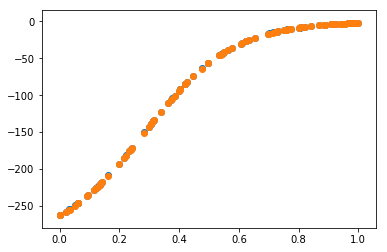

In [61]:
Ypred  = model.predict(X_scaled.T)

plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_scaled, Y)
plt.scatter(X_scaled, Ypred)
plt.show()

In [140]:
Ytest

array([[ 0.49616271],
       [-0.57404316],
       [-0.14980262],
       [ 0.24758488],
       [ 0.53377397],
       [-0.7367855 ],
       [-0.43017896],
       [-0.34301446],
       [-0.12891826],
       [ 0.45988313],
       [-0.89425171],
       [ 0.65709599],
       [-0.24273685],
       [ 0.02551759],
       [-0.65843514],
       [ 0.77295115],
       [-0.35876032],
       [ 0.85724194],
       [-0.33779789],
       [-0.79349688],
       [ 0.73562282],
       [ 0.82273388],
       [ 0.4215032 ],
       [-0.64933155],
       [ 0.13613615],
       [ 0.32397505],
       [ 0.27505891],
       [ 0.2035311 ],
       [-0.89260759],
       [ 0.11737458],
       [ 0.19133348],
       [ 0.1266101 ],
       [-0.89196893],
       [-0.50444334],
       [ 0.21839222],
       [-0.27099156],
       [ 0.4440003 ],
       [-0.94376019],
       [-0.08000508],
       [-0.18607028],
       [-0.48921155],
       [-0.36084623],
       [-0.74465746],
       [-0.94057965],
       [ 0.67880608],
       [-0

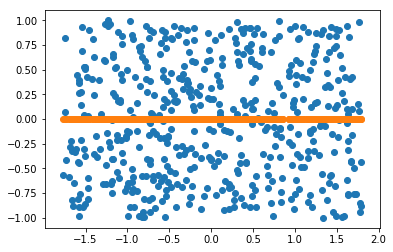

In [139]:
X = train.x.values.reshape(-1, 1)
Y = train.y.values.reshape(-1, 1)
Xtest = test.x.values.reshape(-1, 1)
Ytest = test.y.values.reshape(-1, 1)
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X).reshape(-1, 1)
Xtest_scaled = X_scaler.transform(Xtest).reshape(-1, 1)

plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(Xtest_scaled, Ytest)
plt.scatter(Xtest_scaled, Ypred)
plt.show()

In [5]:
Y == 1

array([[ True, False,  True,  True,  True,  True, False,  True, False,
         True, False,  True,  True,  True, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False,  True,  True, False,  True,  True,  True, False,
        False,  True, False, False, False,  True,  True,  True, False,
        False, False,  True,  True, False, False,  True,  True, False,
         True, False,  True, False, False, False, False,  True, False,
        False,  True,  True, False,  True,  True,  True, False, False,
         True, False,  True,  True, False,  True, False,  True,  True,
        False, False, False, False, False,  True,  True, False, False,
         True, False,  True,  True, False,  True, False, False, False,
         True]])

In [6]:
nn_builder = nn.SequentialBuilder()
nn_builder.add_dense(2, 'relu')
nn_builder.add_dense(50, 'relu')
nn_builder.add_dense(1, 'sigmoid')
model = nn_builder.compile('binary_crossentropy')

In [7]:
parameters, costs = model.fit(X, Y == 1, num_epochs=10000)

Cost after epoch 0: 0.544278
Cost after epoch 1000: 0.084471
Cost after epoch 2000: 0.057180
Cost after epoch 3000: 0.088028
Cost after epoch 4000: 0.037759
Cost after epoch 5000: 0.074274
Cost after epoch 6000: 0.039121
Cost after epoch 7000: 0.037332
Cost after epoch 8000: 0.035601
Cost after epoch 9000: 0.018093


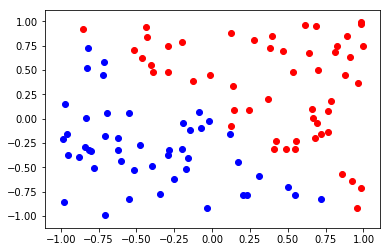

In [8]:
x0, y0 = X[:, (Y == 1)[0]]
plt.scatter(x0, y0, c='red')
x1, y1 = X[:, (Y == 2)[0]]
plt.scatter(x1, y1, c='blue')
plt.show()

In [9]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()
    

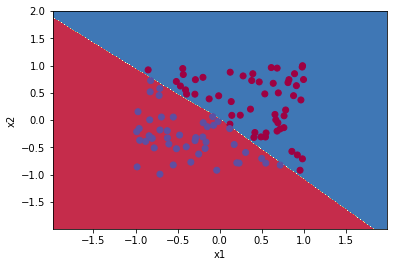

In [10]:
plot_decision_boundary(lambda x: model.predict_classes(x.T) , X, Y)

In [11]:
p = model.predict_classes(X)

In [12]:
Y

array([[1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
        2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
        2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
        2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1]], dtype=int64)

In [13]:
p = (p[0] == False) +1
p

array([1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1])

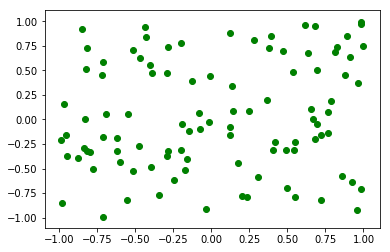

In [14]:
x2, y2 = X[:, (p == Y)[0]]
x3, y3 = X[:, (p != Y)[0]]
#plt.scatter(x0, y0, c='red')
#plt.scatter(x1, y1, c='blue')
plt.scatter(x2, y2, c='green')
plt.scatter(x3, y3, c='red')

plt.show()

In [15]:
train1000 = pd.read_csv("./data_analysis/projekt1/classification/data.simple.train.1000.csv")
test1000 = pd.read_csv("./data_analysis/projekt1/classification/data.simple.test.1000.csv")
n = len(train1000)
X = train1000[['x', 'y']].values.T
Y = train1000.cls.values.reshape(1,-1) == 1
Xt = test1000[['x', 'y']].values.T
Yt = test1000.cls.values.reshape(1,-1) == 1

In [16]:
model2 = nn_builder.compile('binary_crossentropy')

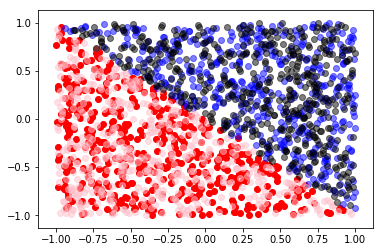

In [17]:
x0, y0 = X[:, (Y == 0)[0]]
x1, y1 = X[:, (Y == 1)[0]]

x2, y2 = Xt[:, (Yt == 0)[0]]
x3, y3 = Xt[:, (Yt == 1)[0]]
plt.scatter(x0, y0, c='red')
plt.scatter(x1, y1, c='blue', alpha=0.5)
plt.scatter(x2, y2, c='pink', alpha=0.5)
plt.scatter(x3, y3, c='black', alpha=0.5)

In [18]:
model2.fit(X, (Y == 1), num_epochs=2000)

Cost after epoch 0: 0.523927
Cost after epoch 1000: 0.040306


({'W1': array([[ 1.58720522,  0.89097113],
         [-0.23057507, -1.52504209],
         [-0.3464139 , -0.35360057],
         [-0.07253465, -0.45240843],
         [ 0.02179022, -0.29163933],
         [-0.94375628,  0.61082874],
         [ 1.12702883,  1.37137047],
         [-0.07946907, -0.36162733],
         [-0.63160003, -1.16281363],
         [ 0.74767631, -0.74158644],
         [-0.94521102, -0.3548164 ],
         [ 1.24077008,  0.33010383],
         [-1.0307594 , -0.93124521],
         [ 0.5763914 , -0.01503567],
         [-0.66900161, -0.47983025],
         [ 1.21855056,  1.62372498],
         [-0.87751492, -0.66292134],
         [-1.04020889, -1.85546833],
         [-1.18499453, -1.16296298],
         [ 1.05062409,  0.12316444],
         [-1.25328868,  0.34823247],
         [-0.44134472, -1.34429051],
         [-0.76763678, -0.73429398],
         [-0.75874779, -0.2898179 ],
         [-1.73769348, -0.37095974],
         [ 1.16008912,  1.02527435],
         [ 1.27898804,  1.184105

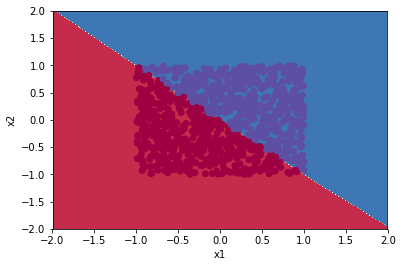

In [19]:
plot_decision_boundary(lambda x: model2.predict_classes(x.T) , X, Y)